Different types of charts simplified in functions.

In [1]:
import pandas as pd
from utils.charts import Monitor, plot_radar_chart, plot_boxplot

monitor = Monitor()

%load_ext autoreload
%autoreload 2

#### Radar Chart

,BioClinicalBERT,BiomedBERT,BioGPT
Malignacy,0.9164,0.9096,0.9167
Mass Shapes,0.7004,0.6302,0.3384
Mass Margins,0.6389,0.6432,0.5382
Calcifications,0.7362,0.6433,0.6054
Architectural Distortion,0.7172,0.6433,0.3491


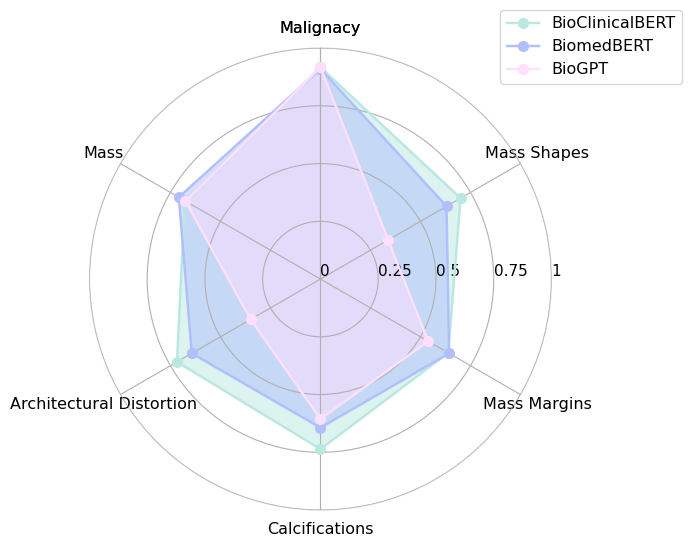

In [2]:
data = pd.DataFrame([[0.9164, 0.9096, 0.9167], 
                     [0.7004, 0.6302, 0.3384], 
                     [0.6389, 0.6432, 0.5382], 
                     [0.7362, 0.6433, 0.6054], 
                     [0.7172, 0.6433, 0.3491], 
                     [0.6784, 0.7080, 0.6747]],
                     index=["Malignacy", "Mass Shapes", "Mass Margins", "Calcifications", "Architectural Distortion", "Mass"],
                     columns=["BioClinicalBERT", "BiomedBERT", "BioGPT"]
                     )

display(data.head())
plot_radar_chart(df=data)

#### Box Plot

,dataset,descriptive_col,experiment_no,split,auc
0,dataset_A,description_A,1,train,0.9839
1,dataset_A,description_A,1,train,0.9391
2,dataset_A,description_A,2,train,0.9591
3,dataset_B,description_A,2,train,0.9831
4,dataset_B,description_A,3,train,0.9831


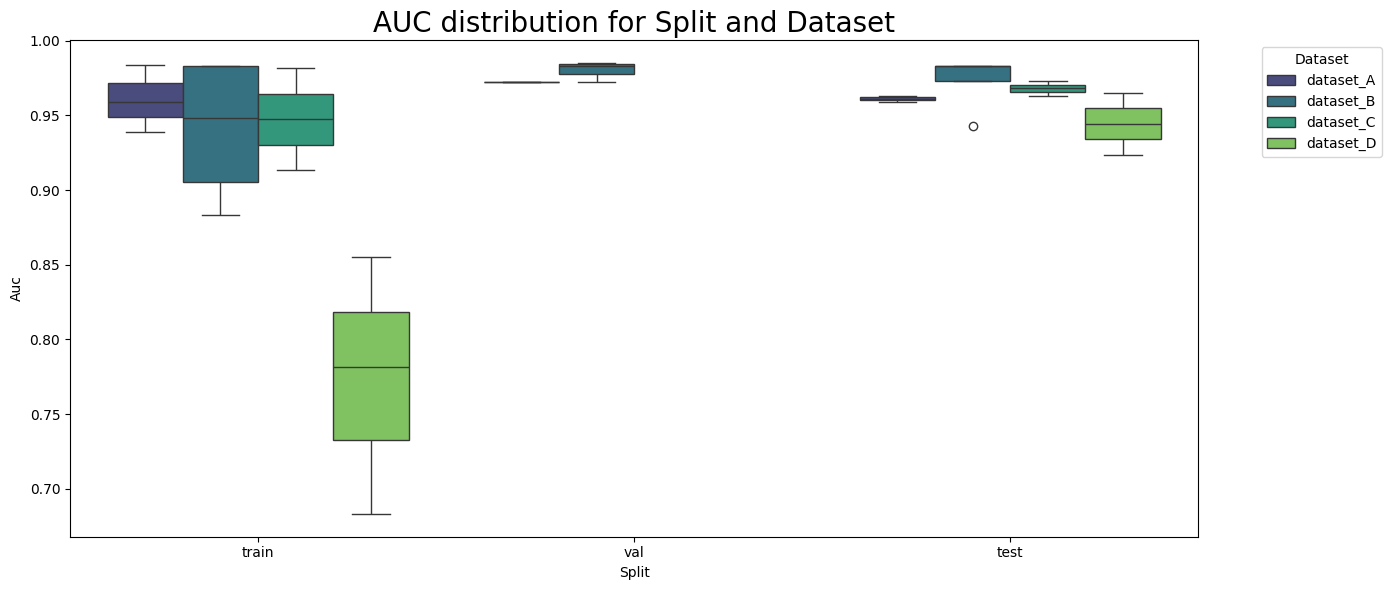

In [3]:
data = pd.DataFrame([["dataset_A", "description_A", "1", "train", 0.9839],
                     ["dataset_A", "description_A", "1", "train", 0.9391],
                     ["dataset_A", "description_A", "2", "train", 0.9591],
                     ["dataset_B", "description_A", "2", "train", 0.9831],
                     ["dataset_B", "description_A", "3", "train", 0.9831],
                     ["dataset_B", "description_A", "3", "train", 0.9131],
                     ["dataset_B", "description_A", "4", "train", 0.8831],
                     ["dataset_C", "description_A", "4", "train", 0.9817],
                     ["dataset_C", "description_A", "4", "train", 0.9131],
                     ["dataset_D", "description_A", "4", "train", 0.8555],
                     ["dataset_D", "description_A", "4", "train", 0.7817],
                     ["dataset_D", "description_A", "4", "train", 0.6831],
                     
                     ["dataset_A", "description_A", "2", "val", 0.9721],
                     ["dataset_B", "description_A", "2", "val", 0.9831],
                     ["dataset_B", "description_A", "2", "val", 0.9851],
                     ["dataset_B", "description_A", "2", "val", 0.9721],

                     ["dataset_A", "description_A", "3", "test", 0.9591],
                     ["dataset_B", "description_A", "3", "test", 0.9831],
                     ["dataset_B", "description_A", "3", "test", 0.9431],
                     ["dataset_A", "description_A", "4", "test", 0.9631],
                     ["dataset_B", "description_A", "1", "test", 0.9831],
                     ["dataset_B", "description_A", "4", "test", 0.9831],
                     ["dataset_C", "description_A", "4", "test", 0.9731],
                     ["dataset_C", "description_A", "4", "test", 0.9631],
                     ["dataset_D", "description_A", "4", "test", 0.9651],
                     ["dataset_D", "description_A", "4", "test", 0.9237]
                    ],
                     columns=["dataset", "descriptive_col", "experiment_no", "split", "auc"]
                   )

display(data.head())
plot_boxplot(df=data, 
                    x_colname="split", 
                    y_colname="auc", 
                    hue_colname="dataset",
                    color_palette = "viridis")

#### Training Logs Plotting

In [5]:
import numpy as np
import time
N = 20

monitor.logs = {
    'dice__metric': [round(np.log2(i)/6, 5) for i in range(1, N+1)],
    'jaccard__metric': [round(i/N*2, 5) for i in range(N)],
    'loss_tr': [round(0.9 * np.exp(-0.5 * i), 2) for i in range(N)],
    'loss_val': [round(0.5 * np.exp(-0.1 * i), 2) for i in range(N)],
    'lrs': [round(i, 5) for i in np.linspace(1e-2, 1e-4, N)],
    
    'epoch_start_timestamps': [
        int(time.time()) - i * 3600 for i in range(N, 0, -1)
    ],
    'epoch_end_timestamps': [
        int(time.time()) - i * 3600 + np.random.randint(500, 1200)
        for i in range(N, 0, -1)
    ],
}

In [6]:
# to export the plots
monitor.plot(export_path="./")

# to plot
# monitor.plot()

saved monitor plot to ./progress.png


In [11]:
# when exporting model checkpoint, we can also export this monitor checkpoint as following
checkpoint = {
    'network_weights': ...,
    'optimizer_state': ...,
    'logging': monitor.get_checkpoint(),
}

checkpoint

{'network_weights': Ellipsis,
 'optimizer_state': Ellipsis,
 'logging': {'dice__metric': [np.float64(0.0),
   np.float64(0.16667),
   np.float64(0.26416),
   np.float64(0.33333),
   np.float64(0.38699),
   np.float64(0.43083),
   np.float64(0.46789),
   np.float64(0.5),
   np.float64(0.52832),
   np.float64(0.55365),
   np.float64(0.57657),
   np.float64(0.59749),
   np.float64(0.61674),
   np.float64(0.63456),
   np.float64(0.65115),
   np.float64(0.66667),
   np.float64(0.68124),
   np.float64(0.69499),
   np.float64(0.70799),
   np.float64(0.72032)],
  'jaccard__metric': [0.0,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.6,
   0.7,
   0.8,
   0.9,
   1.0,
   1.1,
   1.2,
   1.3,
   1.4,
   1.5,
   1.6,
   1.7,
   1.8,
   1.9],
  'loss_tr': [np.float64(0.9),
   np.float64(0.55),
   np.float64(0.33),
   np.float64(0.2),
   np.float64(0.12),
   np.float64(0.07),
   np.float64(0.04),
   np.float64(0.03),
   np.float64(0.02),
   np.float64(0.01),
   np.float64(0.01),
   np.float64(0.0),


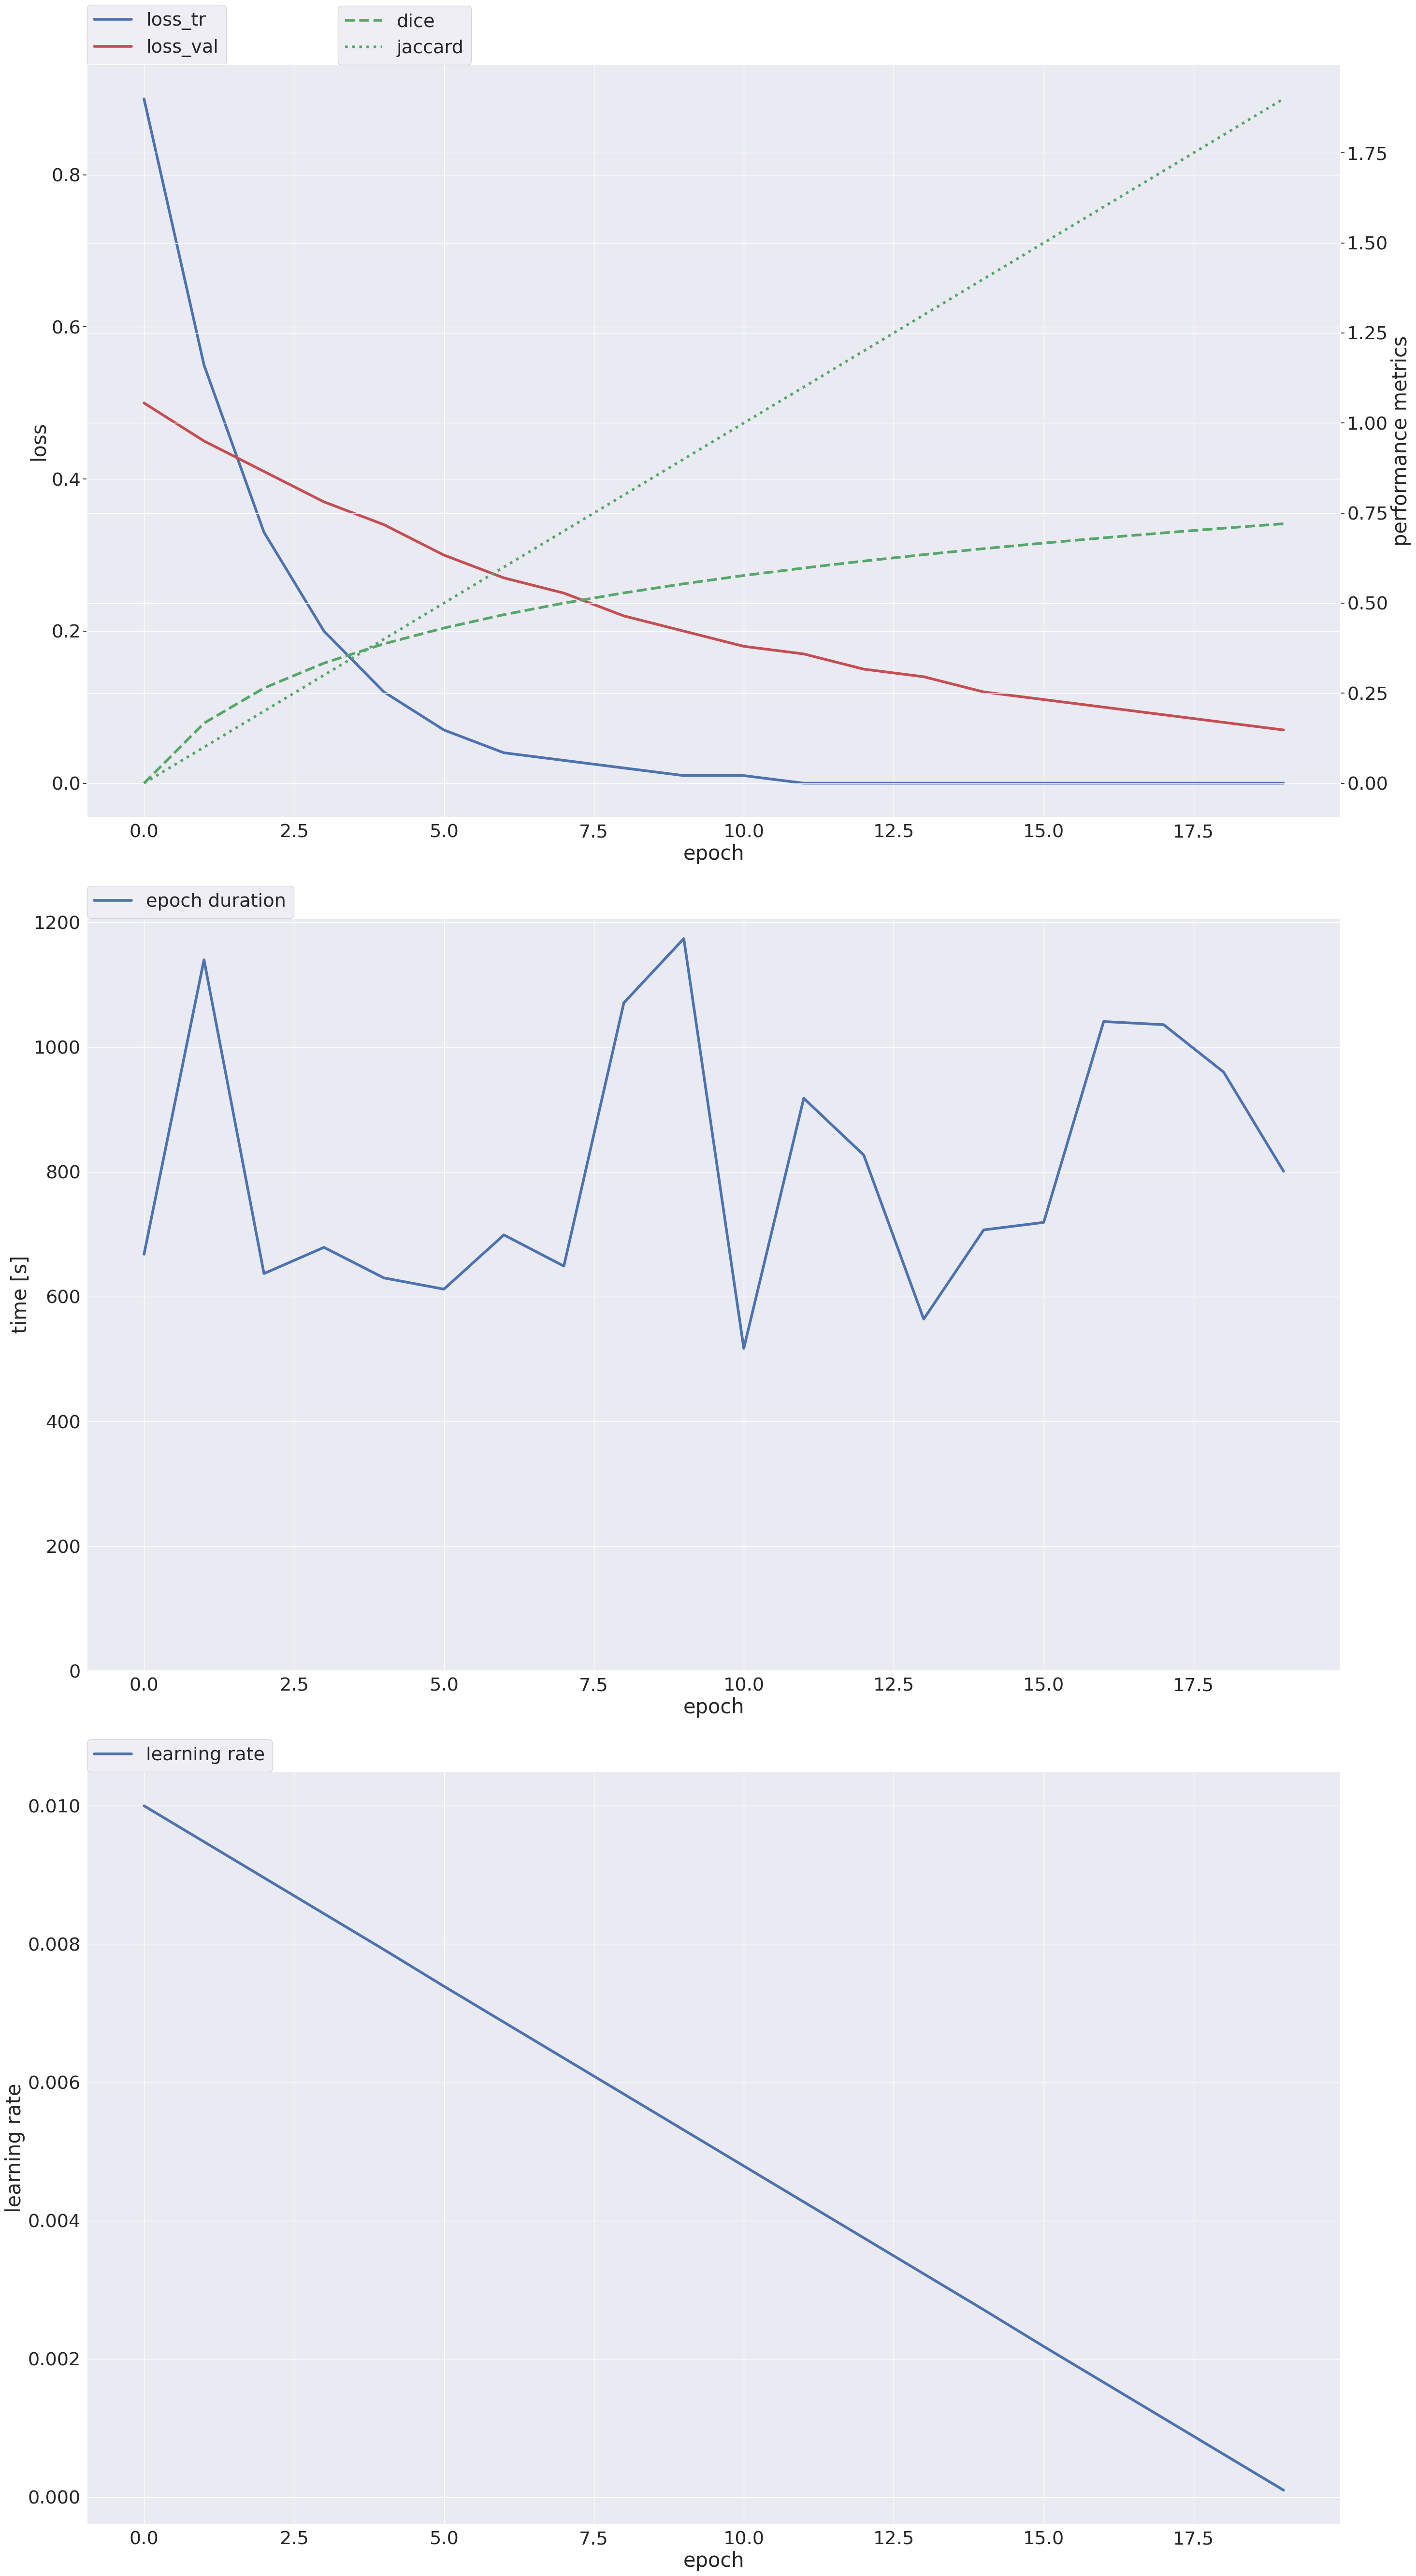

In [12]:
# and to also set the saved monitor checkpoint, we can load it
monitor = Monitor()
# checkpoint = torch.load(filename_or_checkpoint, map_location=self.device, weights_only=False)
monitor.load_checkpoint(checkpoint['logging'])
monitor.plot()